https://www.kaggle.com/c/bike-sharing-demand/data
    
You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

***Data Fields***
datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 
 * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
          
temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated(A casual user is someone who just wants to get a job done and has no interest in mastery)

registered - number of registered user rentals initiated

count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
#import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [2]:
data = pd.read_csv('C:/Users/nehat4/PycharmProjects/Data_Visualization/bike rentals/train.csv', parse_dates=[0])

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Inspection of count column

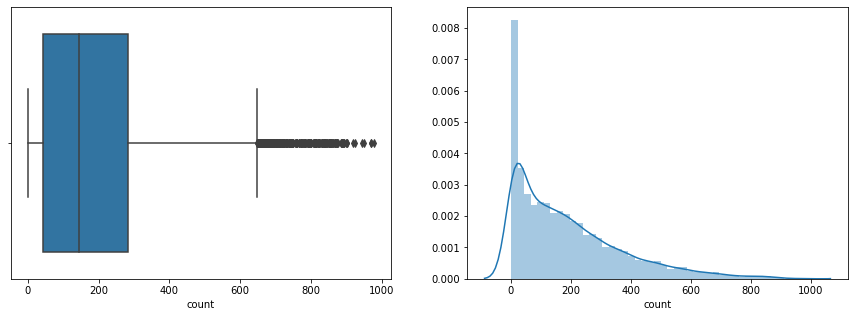

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='count', data=data)
plt.subplot(122)
sns.distplot(data['count'] )

-0.8514116321738531
0.25764327133235915
-0.1539524621267384


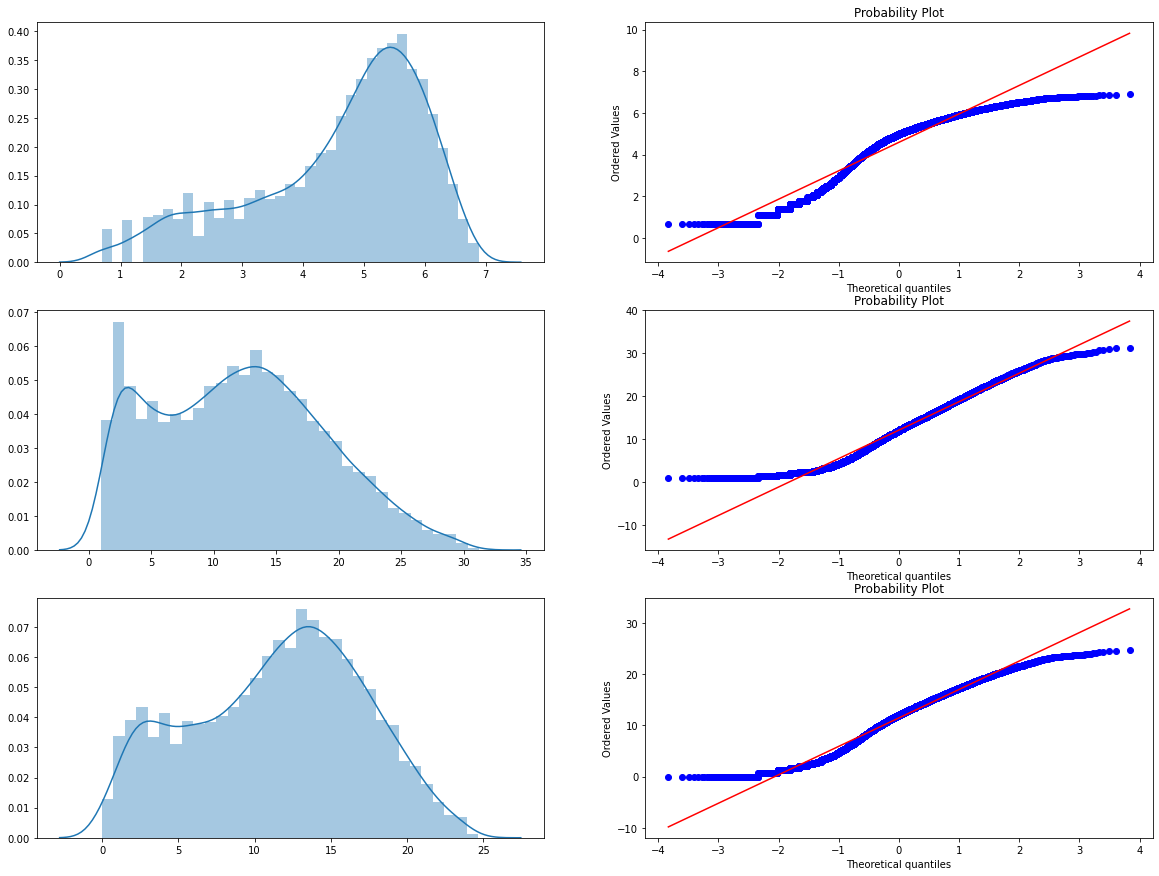

In [16]:


fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(20,15))

temp = np.log1p(data['count'])
plt.subplot(321)
sns.distplot(temp.values )

dat = stats.probplot(temp.values, dist='norm', fit=True, plot=axes[0][1])
print(pd.Series(temp.values).skew())

temp = np.sqrt(data['count'])
plt.subplot(323)
sns.distplot(temp.values )

stats.probplot(temp.values, dist='norm', fit=True,plot=axes[1][1])
print(pd.Series(temp.values).skew())

temp_boxCox =pd.Series(stats.boxcox(data['count'])[0])
plt.subplot(325)
sns.distplot(temp_boxCox.values)

stats.probplot(temp_boxCox.values, dist='norm', fit=True,plot=axes[2][1])
print(pd.Series(temp_boxCox.values).skew())

As we can see the transformation with BoxCox  has highly reduced skewness of count variable. lets add this variable to dataset.

In [17]:
temp_boxCox =pd.Series(stats.boxcox(data['count'])[0])
data['count_boxCox'] = temp_boxCox

temp_log =pd.Series(np.log1p(data['count']))
data['count_log'] = temp_log


# Exploratory Data Analysis

In [6]:
data['year'] = data.datetime.dt.year
data['day'] = data.datetime.dt.day
data['month'] = data.datetime.dt.month
data['hour'] = data.datetime.dt.hour
data['date'] = data.datetime.dt.date
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,month,hour,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,2011-01-01


## bike on rent daily for year 2011 and 2012

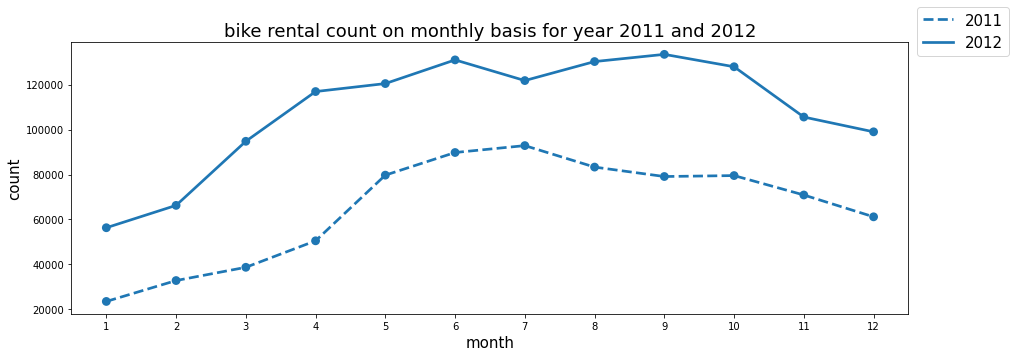

In [8]:
data_year1 = (data[data.year==2011]
                  .groupby('month')
                   ['count'].sum())

data_year2 = (data[data.year==2012]
                  .groupby('month')
                   ['count'].sum())

fig = plt.figure(figsize=(15,5))
sns.pointplot(data_year1.index,data_year1.values, label='2011', linestyles='--')
sns.pointplot(data_year1.index,data_year2.values, label='2012')
plt.xlabel('month',fontsize=15)
plt.ylabel('count',fontsize=15)
fig.legend(['2011','2012'], fontsize=15)
plt.title('bike rental count on monthly basis for year 2011 and 2012',fontsize=18);

Figure shows the number of bike on rent increased in year 2012

[
Summer: June - August

Fall: September - November

Winter: December - February

Spring: March - May

During summer, northern states enjoy warm — even hot — days and cooler mornings and nights, while southern states and tropical areas experience very hot temperatures.

In the fall, temperatures begin to cool down around the country. This is a welcome season in northern regions, where leaves change to beautiful shades of red, yellow and orange.

Winter is fairly mild in the southern states, while the northern, northeastern, midwestern, western mountains and Great Plains regions often encounter snow and colder temperatures.

During the spring, temperatures begin to warm up and thunderstorms and rainstorms are common across the country into the summer months]

Text(0.5, 1.0, 'bike rental count on hourly basis')

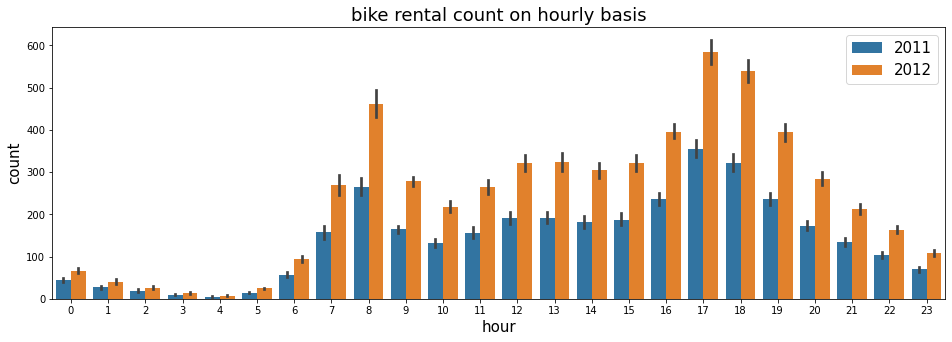

In [9]:
plt.figure(figsize=(16,5))
sns.barplot(x='hour',y='count',hue='year',data=data )
plt.xlabel('hour',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(fontsize=15)
plt.title('bike rental count on hourly basis',fontsize=18)

Bike rental count shows peak at 9am, 5pm, 6pm.this is bcoz in most of the metroploitan cities this is the peak office time and so more people would be renting bikes. this is just one of the plausible reason.

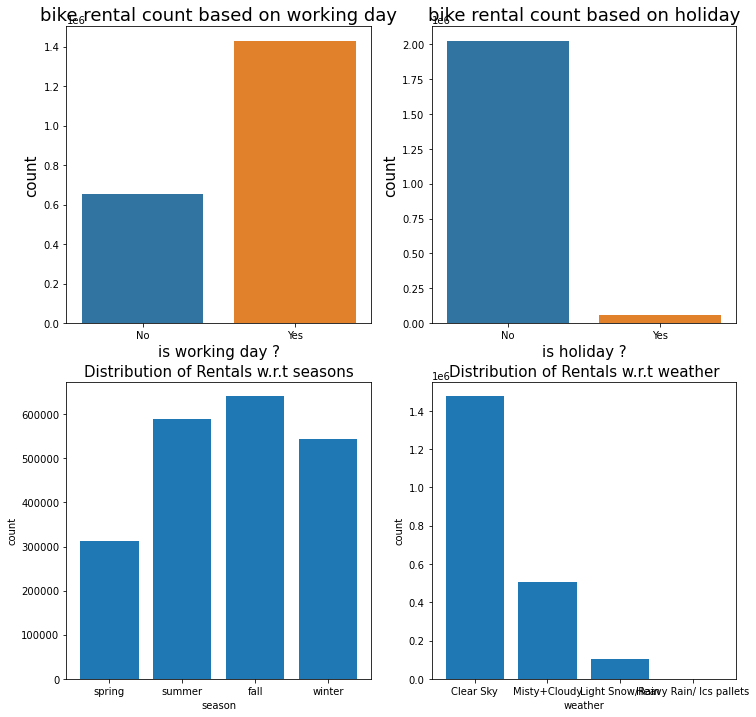

In [13]:
plt.figure(figsize=(12,12))

#rentals based on working day
plt.subplot(2,2,1)
temp = data.groupby('workingday')['count'].sum()
fig=sns.barplot(x=temp.index,y=temp.values)
plt.xlabel('is working day ?',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fig.get_xticks(), np.array(['No','Yes']))
plt.title('bike rental count based on working day',fontsize=18);

#rentals based on holiday
plt.subplot(2,2,2)
temp = data.groupby('holiday')['count'].sum()
fig=sns.barplot(x=temp.index,y=temp.values)
plt.xlabel('is holiday ?',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(fig.get_xticks(), np.array(['No','Yes']))
plt.title('bike rental count based on holiday',fontsize=18);

#rentals based on season
plt.subplot(2,2,3)
data_by_season = (data.groupby('season')
                         ['count'].sum())
data_by_season.rename(index={1:'spring',2 :'summer', 3:'fall', 4:'winter'}
                      ,axis=0, inplace=True)
plt.bar(data_by_season.index, data_by_season.values)
plt.ylabel('count')
plt.xlabel('season')
plt.title('Distribution of Rentals w.r.t seasons',fontsize=15)


#rentals based on weather
plt.subplot(2,2,4)
data_by_weather = (data.groupby('weather')
                         ['count'].sum())
data_by_weather.rename(index={1:'Clear Sky',2 :'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/ Ics pallets'}
                      ,axis=0, inplace=True)
plt.bar(data_by_weather.index, data_by_weather.values)
plt.ylabel('count')
plt.xlabel('weather')
plt.title('Distribution of Rentals w.r.t weather',fontsize=15)
plt.show()



1. bikes are rented more on working days at peak timings at 9am, 5pm-6pm.
2. rentals are lowest in Spring season due to rainy weather. Highest in Fall, Summer, Winter season due to clear sky or  Slightly Cloudy sky.

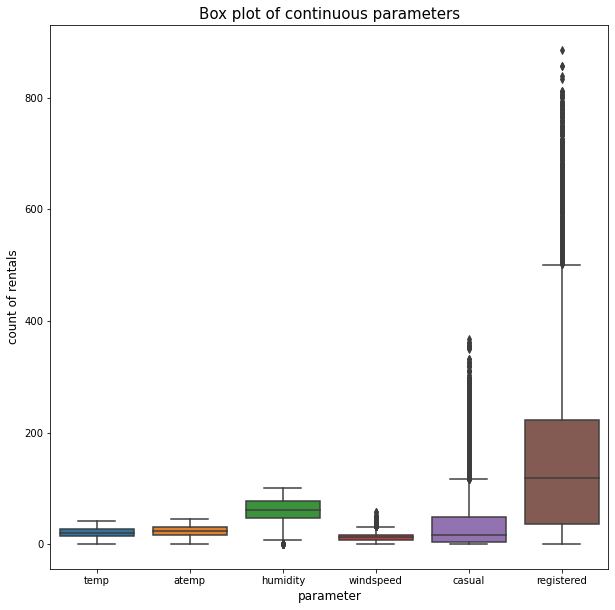

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data[['temp','atemp','humidity','windspeed','casual','registered']])
plt.xlabel('parameter',fontsize=12)
plt.ylabel('count of rentals',fontsize=12)
plt.title('Box plot of continuous parameters', fontsize=15);

***Observations:***

1. temp and atemp features median and range are approximately same.
2. from casual and registered plot we can say that there are more number of registered users as compared to casual users.


# 2. Correlation of features

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 0 Text major ticklabel objects>)

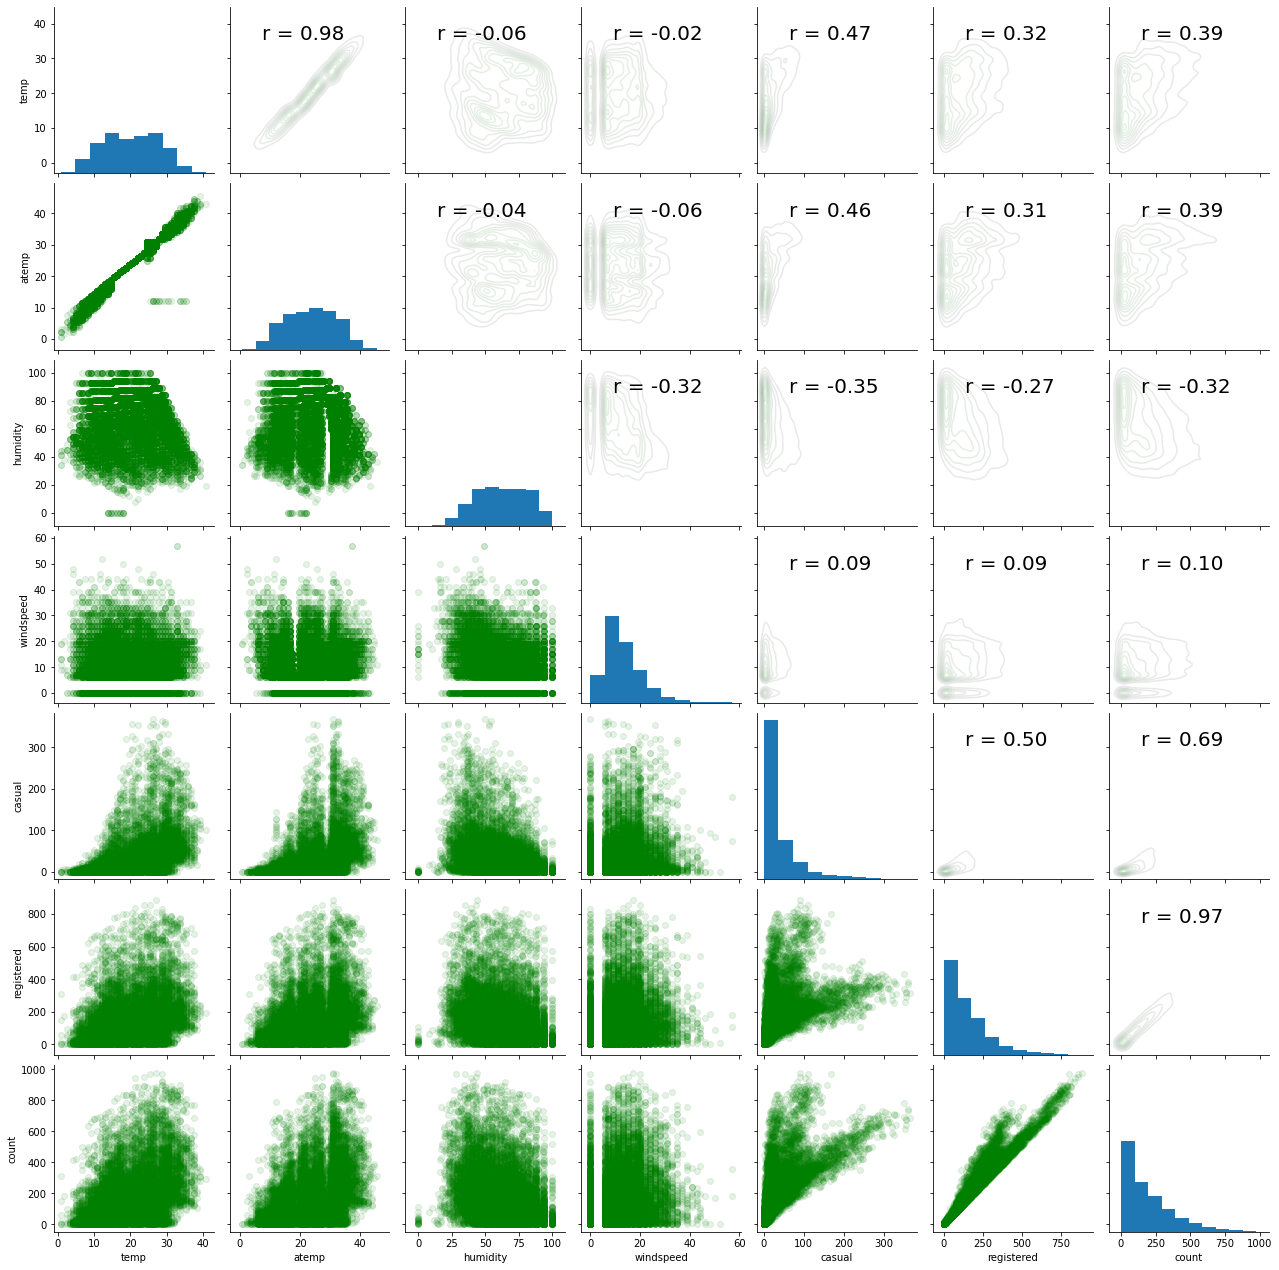

In [162]:
#Correlation of continuous parameters
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
grid = sns.PairGrid(data=data[['temp','atemp','humidity','windspeed','casual','registered','count']])

grid.map_lower(plt.scatter, color='green', alpha=0.1)

grid.map_diag(plt.hist)

grid.map_upper(sns.kdeplot, color='green', alpha=0.1)
grid.map_upper(corr_func)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

1. temp and atemp are collinear
2. temp, atemp, registered, casual are positively correlated with count.(registered showing the highest correlation)
3. registered is positively correlated with temp, atemp, casual.
4. atemp, temp, humidity are uniformly distributed.
5. casual, registered, count, windspeed are positively skewed.

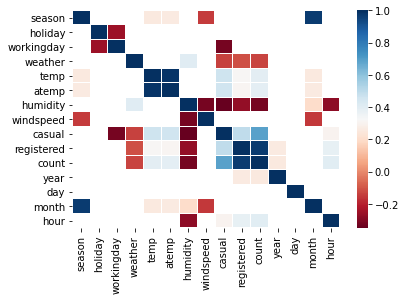

In [5]:
corr_df = data.corr()

sns.heatmap(corr_df[(corr_df>0.2) |(corr_df<-0.1) ],linewidths=0.1, cmap=plt.cm.RdBu)

***Some Obvious relationships:***

1. Season and Temp , Season and atemp are positively correlated.
2. working day and holiday are negatively correlated as expected.
3. casual and working day are negatively correlated.
4. temp, atemp, registered, casual are positively correlated with count.(registered showing the highest correlation)
5. humidity and count are negatively correlated as expected as the weather is humid people will not like to travel on a bike. 
6. As expected, count and hour are positively correlated.

# 3. Feature Engineeering

1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
2. windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
3. "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
4. "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

NOW WE CAN DO SOME FEATURE ENGINEERING AND GET SOME NEW FEATURES AND DROP SOME USELESS OR LESS RELEVANT FEATURES

In [18]:
season = pd.get_dummies(data['season'], prefix='season')
data=pd.concat([data, season], axis=1)

weather = pd.get_dummies(data['weather'], prefix='weather')
data=pd.concat([data, weather], axis=1)

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_boxCox,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,4.433145,2.833213,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,6.982674,3.713572,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,6.292274,3.496508,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,3.950910,2.639057,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0.000000,0.693147,1,0,0,0,1,0,0,0


In [19]:
# drop weather, season and other features
data.drop(columns=['season', 'weather','date','datetime','windspeed','casual','registered','count_boxCox'], inplace=True)


In [20]:
data.head()

,holiday,workingday,temp,atemp,humidity,count,year,day,month,hour,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,16,2011,1,1,0,2.833213,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,40,2011,1,1,1,3.713572,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,32,2011,1,1,2,3.496508,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,13,2011,1,1,3,2.639057,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,1,2011,1,1,4,0.693147,1,0,0,0,1,0,0,0


## 4. RMSLE score

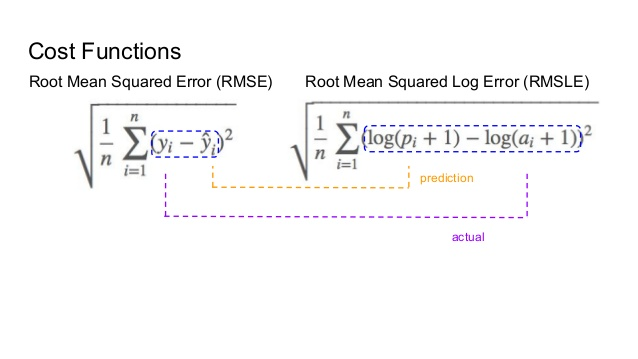

In [24]:
def rmsle(y,y_hat):
    log1 = np.nan_to_num(np.log1p(y))
    print(log1)
    log2 = np.nan_to_num(np.log1p(y_hat))
    print(log2)
    cal = (log1-log2)**2
    return(np.sqrt(np.mean(cal)))


# 5. Modelling 

### Split the dataset

In [25]:
X = data.drop(columns=['count','count_log'], axis=1)
y = data['count_log']
X_train,X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=1) 


## 5.1. Linear Regression model without Regularization

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [316]:
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

predicted = lmodel.predict(X_valid)
print("RMSLE Value For Linear Regression: ",np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(predicted))))

RMSLE Value For Linear Regression:  1.0147154340893851


## 5.2. Regularisation models

### 5.2.1. ridge regression

In [384]:
ridge_m = Ridge()
c_val_exponents = np.linspace(2,-3, 6)
c_vals = np.float(10)**c_val_exponents
print(c_vals)
ridge_params = {'max_iter':[3000], 'alpha':c_vals}

# rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m,
                          ridge_params,
                          scoring ='neg_mean_squared_log_error',
                            cv=4)

grid_ridge_m.fit(X_train, y_train)
predicted = grid_ridge_m.predict(X_train)
print(grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",np.sqrt(mean_squared_log_error(np.expm1(y_train),np.expm1(predicted))))


[1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03]
{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  1.0057810837247037


### 5.2.3. lasso regression

In [419]:
lasso_m_ = Lasso()

c_val_exponents = np.linspace(2,-3, 6)
c_vals = np.float(10)**c_val_exponents
print(c_vals)
lasso_params_ = { 'max_iter':[3000],'alpha':c_vals}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = 'neg_mean_squared_log_error',cv=4)
grid_lasso_m.fit( X_train, y_train )
preds = grid_lasso_m.predict(X= X_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",np.sqrt(mean_squared_log_error(np.expm1(y_train),np.expm1(preds))))


[1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03]
{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  1.0059267793935784


from scores of above 3 models we can see that the RMSLE score reduced but not significantly

## 5.3. Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [402]:

params={'n_estimators':[300, 400, 500, 800, 1000, 2000, 3000, 4000]}
rfModel = RandomForestRegressor(n_estimators=100)

rf_cv = GridSearchCV( rfModel, param_grid=params, scoring = 'neg_mean_squared_log_error',cv=4)
rf_cv.fit(X_train,y_train)
predict = rf_cv.predict(X_train)
print(rf_cv.best_params_)
print ("RMSLE Value For Gradient Boost: ",np.sqrt(mean_squared_log_error(np.expm1(y_train),np.expm1(predict))))


{'n_estimators': 3000}
RMSLE Value For Gradient Boost:  0.11883861027468316


##  5.4. Gradient Boost Regressor

In [30]:
from sklearn.ensemble import GradientBoostingRegressor


In [421]:
params={'n_estimators':[300, 400, 500, 800, 1000, 2000, 3000, 4000]}
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01)
random_forset_m = GridSearchCV( gbm, param_grid=params, scoring = 'neg_mean_squared_log_error',cv=4)
random_forset_m.fit(X_train,y_train)
predict = random_forset_m.predict(X_train)
print ("RMSLE Value For Gradient Boost: ",np.sqrt(mean_squared_log_error(np.expm1(y_train),np.expm1(predict))))


RMSLE Value For Gradient Boost:  0.26154157728669214


# Running the models on Test set

In [31]:
gbm = GradientBoostingRegressor(n_estimators=1000, alpha=0.01)
gbm.fit(X_train,y_train)
predict = gbm.predict(X_valid)
print ("RMSLE Value For Gradient Boost: ",np.sqrt(mean_squared_log_error(np.expm1(y_valid),np.expm1(predict))))


RMSLE Value For Gradient Boost:  0.3056262013896067


In [418]:
features_imp = (pd.DataFrame({'features':X.columns.tolist(), 'Importance':rf_cv.best_estimator_.feature_importances_})
 .sort_values(by='Importance',ascending=False))
features_imp

,features,Importance
8,hour,0.760182
1,workingday,0.052305
2,temp,0.048187
7,month,0.033912
5,year,0.030676
4,humidity,0.023447
3,atemp,0.018494
6,day,0.011295
15,weather_3,0.008797
9,season_1,0.004786


Text(0.5, 1.0, 'training output')

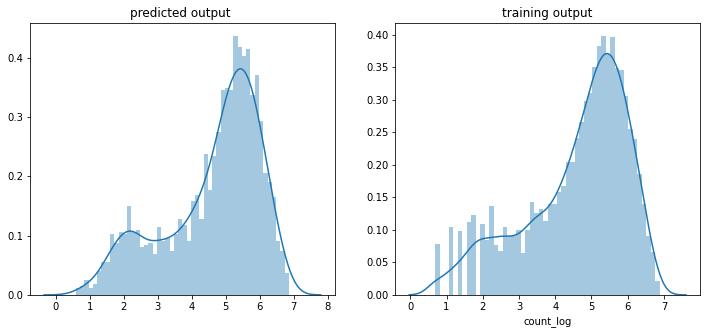

In [33]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(predict,ax=ax1,bins=50)
ax1.set_title("predicted output ")
sns.distplot(y_train,ax=ax2,bins=50)
ax2.set_title("training output")


This figure shows that our model has done preety well job of fitting the test data